<a href="https://colab.research.google.com/github/hdhd7/MalashinLabs/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.24792601835033895 (24.79%)
Epoch 1000, Loss: 0.16940155024342865 (16.94%)
Epoch 2000, Loss: 0.02293004770511792 (2.29%)
Epoch 3000, Loss: 0.014868758403183382 (1.49%)
Epoch 4000, Loss: 0.011310448143168885 (1.13%)
Epoch 5000, Loss: 0.009167500108455764 (0.92%)
Epoch 6000, Loss: 0.0076195985361128095 (0.76%)
Epoch 7000, Loss: 0.006346816117324494 (0.63%)
Epoch 8000, Loss: 0.005213407930114075 (0.52%)
Epoch 9000, Loss: 0.004201191471205719 (0.42%)
Epoch 10000, Loss: 0.0034177114067286737 (0.34%)
Epoch 11000, Loss: 0.002882612294547668 (0.29%)
Epoch 12000, Loss: 0.0025054517229801264 (0.25%)
Epoch 13000, Loss: 0.0022226874503601547 (0.22%)
Epoch 14000, Loss: 0.002000402640841111 (0.20%)
Epoch 15000, Loss: 0.0018198151441315457 (0.18%)
Epoch 16000, Loss: 0.0016695836541114036 (0.17%)
Epoch 17000, Loss: 0.0015423334181727838 (0.15%)
Epoch 18000, Loss: 0.0014329961294687647 (0.14%)
Epoch 19000, Loss: 0.0013379426765955016 (0.13%)


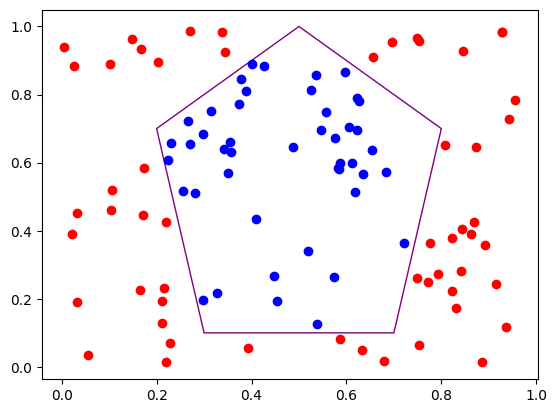

In [2]:
"""ОБУЧАЕМАЯ НЕЙРОСЕТЬ (веса заданы РАНДОМНО)"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.special import expit  #сигмоидальная функция
from matplotlib.patches import Polygon

#количество точек
n = 100
x1 = np.random.random(n)
x2 = np.random.random(n)
X = np.column_stack((x1, x2))

#определение пятиугольника
pentagon = np.array([[0.5, 1], [0.8, 0.7], [0.7, 0.1], [0.3, 0.1], [0.2, 0.7]])

#создаем путь на основе пятиугольника для проверки, находятся ли точки внутри
path = Path(pentagon)

#определение меток для точек: 1 - если внутри фигуры, 0 - если снаружи
y = np.array([1 if path.contains_point([x1[i], x2[i]]) else 0 for i in range(n)]).reshape(-1, 1)

#функции активации
def sigmoid(x):
    return expit(x)  #сигмоидальная функция

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x)) #производная для обучения
#параметры сети
input_size = 2  #входной слой (две координаты)
hidden_size = len(pentagon)  #скрытый слой
output_size = 1  #выходной слой (1 нейрон - бинарная классификация)

#инициализация весов (случайные значения)
W1 = np.random.randn(input_size, hidden_size) * 0.1  #веса между входным и скрытым слоем
b1 = np.random.randn(1, hidden_size) * 0.1  #смещение для скрытого слоя
W2 = np.random.randn(hidden_size, output_size) * 0.1  #веса между скрытым и выходным слоем
b2 = np.random.randn(1, output_size) * 0.1  #смещение для выходного слоя

#параметры обучения
learning_rate = 0.1
epochs = 20000 #эпохи обучения

#обучение сети
for epoch in range(epochs):
    #прямое распространение
    hidden_input = np.dot(X, W1) + b1  #входим в скрытый слой
    hidden_output = sigmoid(hidden_input)  #выходим из скрытого слоя

    final_input = np.dot(hidden_output, W2) + b2  #входим в выходной слой
    final_output = sigmoid(final_input)  #выход сети (предсказание)

    #ошибка
    error = final_output - y

    #обратное распространение ошибки
    d_output = error * sigmoid_derivative(final_input)  #градиент для выходного слоя
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_input)  #градиент для скрытого слоя

    #обновление весов
    W2 -= learning_rate * hidden_output.T.dot(d_output)  #обновляем веса W2
    b2 -= learning_rate * np.sum(d_output, axis=0)  #обновляем смещение b2
    W1 -= learning_rate * X.T.dot(d_hidden)  #обновляем веса W1
    b1 -= learning_rate * np.sum(d_hidden, axis=0)  #обновляем смещение b1

    #каждые 1000 эпох выводим ошибку для контроля
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        loss_percentage = loss * 100  #преобразование в проценты
        print(f'Epoch {epoch}, Loss: {loss} ({loss_percentage:.2f}%)')

#предсказания на обучающей выборке
predictions = (final_output > 0.5).astype(int).flatten()

#визуализация
polygon = Polygon(pentagon, facecolor='none', edgecolor='purple')
plt.gca().add_patch(polygon)

#отображение точек в зависимости от предсказаний
for i in range(n):
    if predictions[i] == 1:
        plt.scatter(x1[i], x2[i], c="blue")
    else:
        plt.scatter(x1[i], x2[i], c="red")

plt.show()

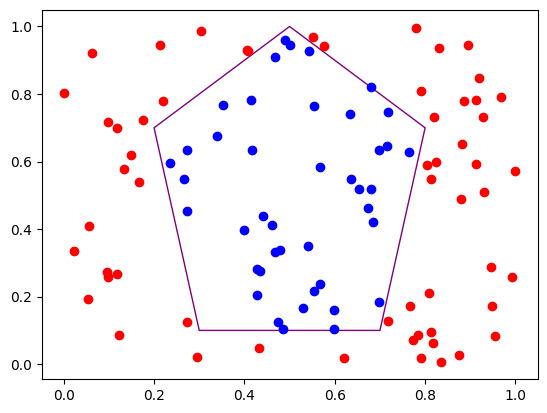

In [3]:
"""НЕОБУЧАЕМАЯ НЕЙРОСЕТЬ (веса заданы ЗАРАНЕЕ)"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.special import expit  #сигмоидальная функция
from matplotlib.patches import Polygon

#количество точек
n = 100
x1 = np.random.random(n)
x2 = np.random.random(n)
X = np.column_stack((x1, x2))

#определение пятиугольника
pentagon = np.array([[0.5, 1], [0.8, 0.7], [0.7, 0.1], [0.3, 0.1], [0.2, 0.7]])

#создаем путь на основе пятиугольника для проверки, находятся ли точки внутри
path = Path(pentagon)

#функция активации
def sigmoid(x):
    return expit(x)  #сигмоидальная функция

#параметры сети
input_size = 2  #входной слой (две координаты)
hidden_size = 5  #скрытый слой (соответствует количеству вершин)
output_size = 1  #выходной слой (1 нейрон - бинарная классификация)

#инициализация весов (задаем фиксированные значения)
W1 = np.array([[1, -1, -1, 1, 0],
                [1, 1, -1, -1, 0]])  #веса для скрытого слоя
b1 = np.zeros((1, hidden_size))  #смещение для скрытого слоя
W2 = np.array([[1], [1], [1], [1], [1]])  #веса для выходного слоя
b2 = np.zeros((1, output_size))  #смещение для выходного слоя

#прямое распространение
hidden_input = np.dot(X, W1) + b1  #входим в скрытый слой
hidden_output = sigmoid(hidden_input)  #выходим из скрытого слоя

final_input = np.dot(hidden_output, W2) + b2  #входим в выходной слой
final_output = sigmoid(final_input)  #выход сети (предсказание)

#предсказания на обучающей выборке
predictions = (final_output > 0.5).astype(int).flatten()

#метод для определения, находятся ли точки внутри пятиугольника
inside = path.contains_points(X)

#визуализация
polygon = Polygon(pentagon, facecolor='none', edgecolor='purple')
plt.gca().add_patch(polygon)

#отображение точек в зависимости от того, находятся ли они внутри фигуры
for i in range(n):
    if inside[i]:
        plt.scatter(x1[i], x2[i], c="blue")  #внутри фигуры
    else:  #если точка снаружи пятиугольника
        plt.scatter(x1[i], x2[i], c="red")   #снаружи фигуры

plt.show()